# Homework 4
By Wanyan(Wendy) Shao

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

# Question 1 Exploratory Data Analysis

* From example/input/ load compustat.csv inside compustat.zip  without unzip compustat.zip
* 1. Variable names that we are interested in:
    * sic code: four digits integer for company
    * datecqtr: year/ quarter time for the record
    * cusip: compustats identifier for a company
    * chod: shares out of standing (in million)
    * saleq: sales of current quarter (in million)
    * prccq: close price of current quarter (in dollar)
    
* 2. For saleq and market cap, compute the following:
    * Time series mean 
    * Time Series standard deviation
    * Time Series count of missing values
    * Time Series ratio of missing values
    * Aggregate the result in a dataframe
        
* 3. Answer the following questions:
    * Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
    * Implement some schemes to detect outliers.
    * Do you find some outliers? Could you think why? You can do some research using google.
    * What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

In [2]:
# load compustat.csv from compustat.zip
import zipfile
with zipfile.ZipFile('./example/input/compustat.zip', 'r') as z:
    f = z.open('compustat.csv')
    data_raw = pd.read_csv(f)
data_raw.head()


,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


In [3]:
# select columns that we are interested in
data = data_raw.loc[:,["sic", "datacqtr", "cusip", "cshoq", "saleq", "prccq"]]
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq
0,3089.0,1966Q1,000032102,0.219,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811299 entries, 0 to 1811298
Data columns (total 6 columns):
sic         float64
datacqtr    object
cusip       object
cshoq       float64
saleq       float64
prccq       float64
dtypes: float64(4), object(2)
memory usage: 82.9+ MB


In [5]:
# Aggregate "market_cap"
data["market_cap"] = data["cshoq"] * data["prccq"]
data.head(20)

,sic,datacqtr,cusip,cshoq,saleq,prccq,market_cap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN
5,3089.0,1967Q2,000032102,0.277,NaN,NaN,NaN
6,3089.0,1967Q3,000032102,0.277,NaN,NaN,NaN
7,3089.0,1967Q4,000032102,0.277,5.363,NaN,NaN
8,3089.0,1968Q1,000032102,0.645,NaN,NaN,NaN
9,3089.0,1968Q2,000032102,0.645,NaN,NaN,NaN


In [6]:
# check outliers by using plot
print(data["market_cap"].describe())
data["market_cap"].hist()

count    1.343023e+06
mean     2.057473e+03
std      1.320220e+04
min      0.000000e+00
25%      2.000701e+01
50%      9.421800e+01
75%      5.257138e+02
max      1.540774e+06
Name: market_cap, dtype: float64


count    1.541801e+06
mean     4.451507e+02
std      2.679707e+03
min     -2.562300e+04
25%      3.210000e+00
50%      2.182500e+01
75%      1.305300e+02
max      2.073073e+05
Name: saleq, dtype: float64


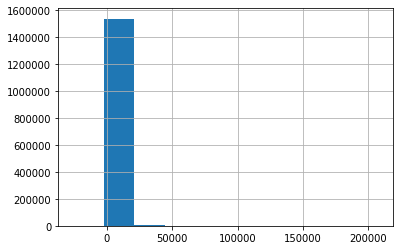

In [7]:
print(data["saleq"].describe())
data["saleq"].hist()

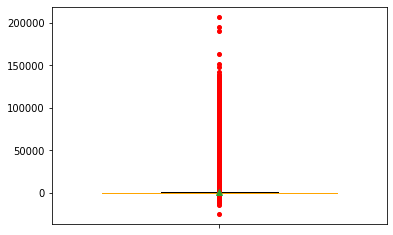

In [33]:
# use boxplot to check outliers
import matplotlib.pyplot as plt

# boxplot for saleq
plt.boxplot(x = data["saleq"].dropna(),
           whis = 1.5,
           widths = 0.7,
           patch_artist = True,
           showmeans = True,
           boxprops = {'facecolor': 'steelblue'},
           flierprops = {'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': 4},
           medianprops = {'linestyle': '-', 'color': 'orange'},
           labels = [''])
plt.show()

In [32]:
# find the outliers
Q1 = data["saleq"].quantile(q = 0.25)
Q3 = data["saleq"].quantile(q = 0.75)

# upper bound and lower bound based on 1.5 times of quantile difference
lower_bound = Q1 - 1.5*(Q3 - Q1)
upper_bound = Q3 + 1.5*(Q3 - Q1)

# find the outliers
data["saleq"][(data["saleq"] > upper_bound) | (data["saleq"] < lower_bound)]

271         534.195
272         572.846
273         550.500
274         512.800
275         520.200
             ...   
1811188     559.800
1811189     566.700
1811190     520.900
1811233    1704.000
1811235     749.000
Name: saleq, Length: 174006, dtype: float64

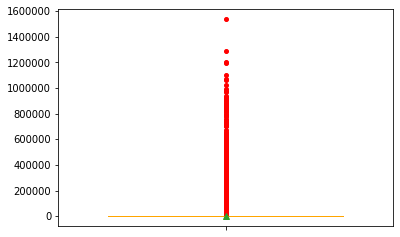

In [144]:
# boxplot for market_cap
plt.boxplot(x = data["market_cap"].dropna(),
           whis = 1.5,
           widths = 0.7,
           patch_artist = True,
           showmeans = True,
           boxprops = {'facecolor': 'steelblue'},
           flierprops = {'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': 4},
           medianprops = {'linestyle': '-', 'color': 'orange'},
           labels = [''])
plt.show()

In [34]:
# find the outliers
Q1 = data["market_cap"].quantile(q = 0.25)
Q3 = data["market_cap"].quantile(q = 0.75)

# upper bound and lower bound based on 1.5 times of quantile difference
lower_bound = Q1 - 1.5*(Q3 - Q1)
upper_bound = Q3 + 1.5*(Q3 - Q1)

# find the outliers
data["market_cap"][(data["market_cap"] > upper_bound) | (data["market_cap"] < lower_bound)]

294        1444.03182
295        1474.92862
296        1551.45804
297        1635.36347
298        1533.30055
              ...    
1811242    1478.62000
1811243    1821.29200
1811244    1652.34300
1811245    2151.76500
1811246    1915.46800
Name: market_cap, Length: 206869, dtype: float64

In [27]:
saleq_mean = data["saleq"].mean()
mktcap_mean = data["market_cap"].mean()
saleq_std = data["saleq"].std()
mktcap_std = data["market_cap"].std()
saleq_nan = data["saleq"].isnull().sum()
mktcap_nan = data["market_cap"].isnull().sum()
saleq_nan_ratio = saleq_nan/(data["saleq"].count()+saleq_nan)
mktcap_nan_ratio = mktcap_nan/(data["market_cap"].count()+ mktcap_nan)

s = pd.Series([saleq_mean,saleq_std,saleq_nan,saleq_nan_ratio], index = ["Mean","Std","N_NaN","NaN_Ratio"])
m = pd.Series([mktcap_mean,mktcap_std,mktcap_nan,mktcap_nan_ratio], index = ["Mean","Std","N_NaN","NaN_Ratio"])

data_stats = pd.concat([s,m],axis = 1)
data_stats.columns = ['saleq','market_cap'] 
print(data_stats)

                   saleq     market_cap
Mean          445.150664    2057.473104
Std          2679.706576   13202.197457
N_NaN      269498.000000  468276.000000
NaN_Ratio       0.148787       0.258530


From the histogram about for each variable, we found that both of them have outliers as the max values are far bigger than the mean.
From boxplots about each variable, we found that there are too many extremly large outliers, which make the box invisible in both figures. This results illustrate the sale quantity and market capital can't be analyzed in the time series for all the company as the companies have great differences from different industry, even in the same industry, small company and large company have wide gaps in their ability, which means a centralized distribution can't capture their performance, e.g. saleq and market_cap.

# Question 2 Compute Industry Concentration

The defination of HHI index could be found: 

https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.

This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [52]:
#  using a 2 digit SIC code
data2 = data.dropna().reset_index(drop = True)
data2["sic"] =  data2["sic"].astype(str)
data2["sic"] = data2["sic"].str[:2]
data2["sic"].unique()

array(['30', '58', '57', '50', '37', '27', '36', '35', '34', '48', '33',
       '65', '38', '73', '32', '45', '67', '79', '39', '28', '78', '23',
       '87', '49', '26', '56', '13', '51', '63', '59', '22', '60', '62',
       '99', '10', '47', '12', '54', '64', '44', '20', '70', '80', '53',
       '42', '75', '17', '14', '15', '61', '25', '31', '24', '29', '72',
       '16', '40', '21', '82', '55', '52', '83', '41', '90', '84', '76',
       '46', '89', '81', '86'], dtype=object)

In [88]:
# calculate market share for each industry in each quater
data2["total_industry_shr"] = data2.groupby(["sic","datacqtr"])["market_cap"].transform("sum")     #total industry shares for each quater
data2["market_shr"] = data2["market_cap"]/data2["total_industry_shr"]*100         #company market share in the given industry for each quarter
data2["market_shr_sqr"] = data2["market_shr"]*data2["market_shr"]
data2["HHI"] = data2.groupby(["sic","datacqtr"])["market_shr_sqr"].transform("sum")    #HHI for each industry in each quarter
data2.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq,market_cap,total_industry_shr,market_shr,market_shr_sqr,HHI,HHI_average
0,30,1970Q3,000032102,2.230,10.698,11.750,26.202500,5948.329125,0.440502,0.194042,1849.571608,1404.552682
1,30,1970Q4,000032102,2.446,10.919,10.000,24.460000,8067.256308,0.303201,0.091931,1424.771672,1404.552682
2,30,1971Q1,000032102,3.507,7.983,9.750,34.193250,8344.458335,0.409772,0.167913,1386.952707,1404.552682
3,30,1971Q2,000032102,3.518,9.885,8.250,29.023500,9039.093803,0.321089,0.103098,1296.213826,1404.552682
4,30,1971Q3,000032102,3.515,7.975,4.625,16.256875,8831.406151,0.184080,0.033886,1386.786799,1404.552682


In [89]:
# calculate HHI average for each industry
data2["HHI_average"] = data2.groupby("sic")["HHI"].transform("mean")   
hhi_avg = data2.loc[:,["sic","HHI_average"]].drop_duplicates(["sic"]).reset_index(drop = True)
hhi_avg.head()

,sic,HHI_average
0,30,1686.412117
1,58,2303.659827
2,57,2716.848618
3,50,630.038308
4,37,973.109153


In [90]:
# select the top4
hhi_avg.sort_values("HHI_average", ascending = False).head()

,sic,HHI_average
68,81,9134.847753
63,90,8811.546856
64,84,8736.967212
62,41,6736.393268
57,21,5750.351743


In [134]:
# select the data for top4 sic, sort the hhi value by datacqtr
data_81 = data2[data2["sic"] == "81"].loc[:, ["sic", "datacqtr", "HHI"]].drop_duplicates().reset_index(drop = True).sort_values("datacqtr")# sort_values by ascending time
data_81["datacqtr"] = pd.to_datetime(data_81["datacqtr"].str[:4]+ data_81["datacqtr"].str[4:])
data_90 = data2[data2["sic"] == "90"].loc[:, ["sic", "datacqtr", "HHI"]].drop_duplicates().reset_index(drop = True).sort_values("datacqtr")# sort_values by ascending time
data_90["datacqtr"] = pd.to_datetime(data_90["datacqtr"].str[:4]+ data_90["datacqtr"].str[4:])
data_84 = data2[data2["sic"] == "84"].loc[:, ["sic", "datacqtr", "HHI"]].drop_duplicates().reset_index(drop = True).sort_values("datacqtr")# sort_values by ascending time
data_84["datacqtr"] = pd.to_datetime(data_84["datacqtr"].str[:4]+ data_84["datacqtr"].str[4:])
data_41 = data2[data2["sic"] == "41"].loc[:, ["sic", "datacqtr", "HHI"]].drop_duplicates().reset_index(drop = True).sort_values("datacqtr")# sort_values by ascending time
data_41["datacqtr"] = pd.to_datetime(data_41["datacqtr"].str[:4]+ data_41["datacqtr"].str[4:])

Text(0.5, 1.0, 'sic = 41')

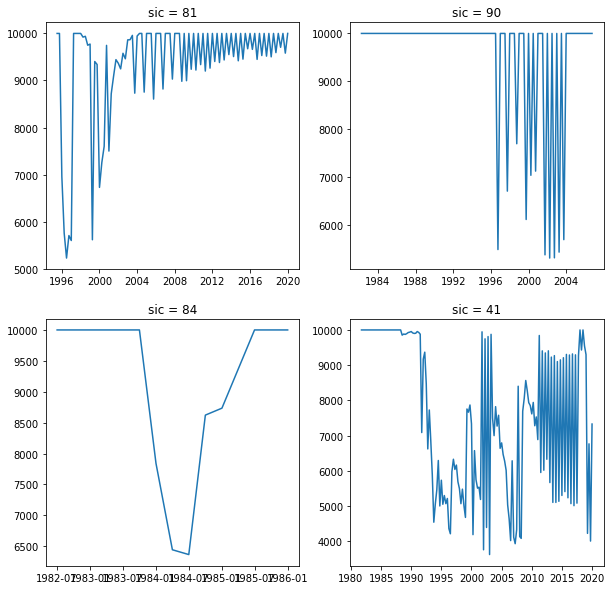

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].plot(data_81["datacqtr"], data_81["HHI"])
axes[0,0].set_title("sic = 81")
axes[0,1].plot(data_90["datacqtr"], data_90["HHI"])
axes[0,1].set_title("sic = 90")
axes[1,0].plot(data_84["datacqtr"], data_84["HHI"])
axes[1,0].set_title("sic = 84")
axes[1,1].plot(data_41["datacqtr"], data_41["HHI"])
axes[1,1].set_title("sic = 41")